# Book Recommendation System – Data Overview

## Objective
The goal of this notebook is to load and understand the Goodreads books dataset.
We analyze the structure, basic statistics, and data quality before performing
data cleaning and feature engineering in later stages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [6]:
data_path = "../data/raw/Goodreadss Books.csv"
df = pd.read_csv(data_path)

df.head()


,Unnamed: 0,bookId,title,author,series,description,genres,awards,characters,places,isbn,isbn13,language,first_publish_date,publish_date,num_pages,num_ratings,num_reviews,avg_rating,rated_1,rated_2,rated_3,rated_4,rated_5
0,0,1,Harry Potter and the Half-Blood Prince,J.K. Rowling,Harry Potter #6,The war against Voldemort is not going well; e...,"Art,Biography,Business,Children's,Christian,Cl...",Locus Award Nominee for Best Young Adult Novel...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Eng...",NaN,NaN,English,July 16th 2005,September 16th 2006,652.0,2553909.0,41470.0,4.57,13147.0,29020.0,174312.0,608825.0,1728605.0
1,1,2,Harry Potter and the Order of the Phoenix,"J.K. Rowling,Mary GrandPré",Harry Potter #5,There is a door at the end of a silent corrido...,"Art,Biography,Business,Children's,Christian,Cl...",Bram Stoker Award for Works for Young Readers ...,"Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",0439358078,9780439358071,English,June 21st 2003,September 2004,870.0,2631427.0,44793.0,4.50,16236.0,41738.0,231438.0,665628.0,1676387.0
2,2,3,Harry Potter and the Sorcerer's Stone,"J.K. Rowling,Mary GrandPré",Harry Potter #1,Harry Potter's life is miserable. His parents ...,"Art,Biography,Business,Children's,Christian,Cl...",Mythopoeic Fantasy Award for Children's Litera...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","London, England,Hogwarts School of Witchcraft ...",NaN,NaN,English,June 26th 1997,November 1st 2003,309.0,7434783.0,117823.0,4.48,126344.0,147184.0,627803.0,1694206.0,4839246.0
3,3,4,Harry Potter and the Chamber of Secrets,J.K. Rowling,Harry Potter #2,The Dursleys were so mean and hideous that sum...,"Art,Biography,Business,Children's,Christian,Cl...",Mythopoeic Fantasy Award for Children's Litera...,"Draco Malfoy,Ron Weasley,Petunia Dursley,Verno...","Hogwarts School of Witchcraft and Wizardry,Hog...",0439554896,9780439554893,English,July 2nd 1998,November 1st 2003,352.0,2878196.0,55839.0,4.43,15623.0,55060.0,315917.0,787181.0,1704415.0
4,4,5,Harry Potter and the Prisoner of Azkaban,"J.K. Rowling,Mary GrandPré",Harry Potter #3,"For twelve long years, the dread fortress of A...","Art,Biography,Business,Children's,Christian,Cl...",Bram Stoker Award for Best Work for Young Read...,"Sirius Black,Draco Malfoy,Ron Weasley,Petunia ...","Hogwarts School of Witchcraft and Wizardry,Lon...",NaN,9780439655484,English,July 8th 1999,May 1st 2004,435.0,2972519.0,58483.0,4.57,14124.0,29105.0,214151.0,701765.0,2013374.0


In [11]:
print("Dataset Shape:", df.shape)
df.columns


Dataset Shape: (20068, 24)


Index(['Unnamed: 0', 'bookId', 'title', 'author', 'series', 'description',
       'genres', 'awards', 'characters', 'places', 'isbn', 'isbn13',
       'language', 'first_publish_date', 'publish_date', 'num_pages',
       'num_ratings', 'num_reviews', 'avg_rating', 'rated_1', 'rated_2',
       'rated_3', 'rated_4', 'rated_5'],
      dtype='object')

In [12]:
df.dtypes

Unnamed: 0              int64
bookId                  int64
title                  object
author                 object
series                 object
description            object
genres                 object
awards                 object
characters             object
places                 object
isbn                   object
isbn13                 object
language               object
first_publish_date     object
publish_date           object
num_pages             float64
num_ratings           float64
num_reviews           float64
avg_rating            float64
rated_1               float64
rated_2               float64
rated_3               float64
rated_4               float64
rated_5               float64
dtype: object

In [14]:
df.isnull().sum()


Unnamed: 0                0
bookId                    0
title                   559
author                  561
series                15789
description            2687
genres                  256
awards                16939
characters            15289
places                16028
isbn                   2537
isbn13                  858
language               2779
first_publish_date     5477
publish_date           1046
num_pages              1640
num_ratings             559
num_reviews             559
avg_rating              559
rated_1                3430
rated_2                3430
rated_3                3430
rated_4                3430
rated_5                3430
dtype: int64

In [15]:
df.describe()


,Unnamed: 0,bookId,num_pages,num_ratings,num_reviews,avg_rating,rated_1,rated_2,rated_3,rated_4,rated_5
count,20068.000000,20068.000000,18428.000000,1.950900e+04,19509.000000,19509.000000,16638.000000,16638.000000,1.663800e+04,1.663800e+04,1.663800e+04
mean,10033.500000,9980.296990,292.454580,7.410352e+04,2073.157825,3.694199,2269.427575,4625.519654,1.570520e+04,2.780118e+04,3.648904e+04
std,5793.276937,5762.986523,307.325611,3.302812e+05,7394.394617,0.998125,10663.287509,18495.318026,5.798617e+04,1.062333e+05,1.774864e+05
min,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,5016.750000,5014.750000,148.000000,2.000000e+01,2.000000,3.670000,1.000000,4.000000,1.700000e+01,2.600000e+01,2.400000e+01
50%,10033.500000,9937.500000,252.000000,4.370000e+02,32.000000,3.930000,17.000000,56.000000,2.420000e+02,3.800000e+02,3.560000e+02
75%,15050.250000,14968.250000,369.000000,1.114600e+04,567.000000,4.140000,323.750000,979.000000,3.945500e+03,6.686750e+03,6.131500e+03
max,20067.000000,20000.000000,23931.000000,7.444102e+06,117992.000000,5.000000,562807.000000,560978.000000,1.052619e+06,1.696235e+06,4.845445e+06


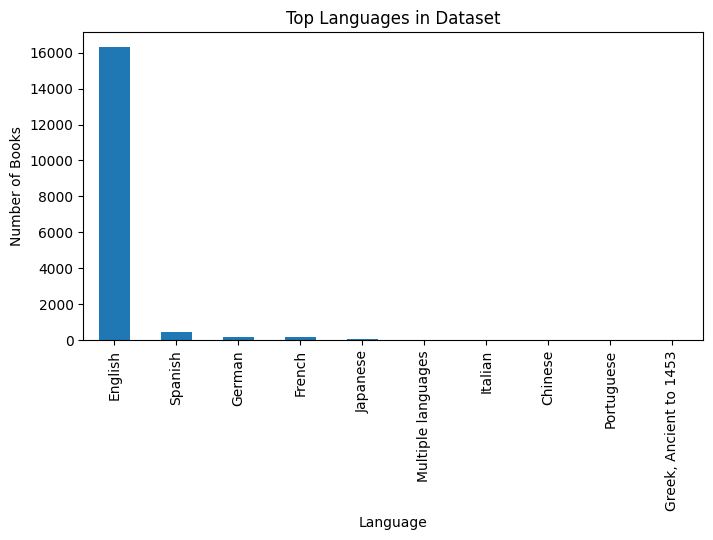

In [18]:
plt.figure(figsize=(8,4))
df['language'].value_counts().head(10).plot(kind='bar')
plt.title("Top Languages in Dataset")
plt.xlabel("Language")
plt.ylabel("Number of Books")
plt.show()


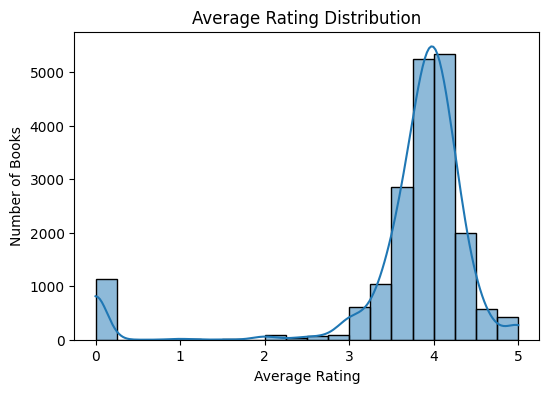

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(df['avg_rating'], bins=20, kde=True)
plt.title("Average Rating Distribution")
plt.xlabel("Average Rating")
plt.ylabel("Number of Books")
plt.show()


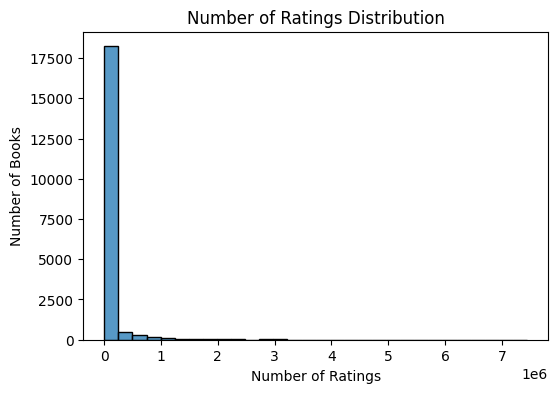

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df['num_ratings'], bins=30)
plt.title("Number of Ratings Distribution")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Books")
plt.show()


In [21]:
df[['title', 'author', 'avg_rating', 'num_ratings']] \
    .sort_values(by='avg_rating', ascending=False) \
    .head(10)


,title,author,avg_rating,num_ratings
19942,Portugal: Garden of Europe,"Julia Wilkinson,Steve Vidler",5.0,1.0
5670,Barbarians in the Saddle: Intellectual Biograp...,Joseph Scotchie,5.0,1.0
5674,Ethics And Rhetoric Of The Chinese Cultural Re...,Lowell Dittmer,5.0,1.0
19940,Satyajit Ray,Santi Das,5.0,1.0
2394,Symbolism in Herman Melville's Moby Dick: From...,Leonard A. Slade Jr.,5.0,1.0
18732,Web of Words: the ideas behind politics,David Bodanis,5.0,1.0
4973,Focus on the Wonder Years: Challenges Facing t...,"Jaana Juvonen,Tessa Kaganoff,Vi-Nhuan Le",5.0,2.0
18624,Literature Circle Guide,"Susan Van Zile,Theodore Taylor",5.0,1.0
7715,"John Graham, Artist and Avatar","Eleanor Green,Ellen Hicks,Willem De Looper",5.0,1.0
7716,W. Barns-Graham: A Studio Life,"Lynne Green,Wilhelmina Barns-Graham",5.0,1.0


In [24]:
df['genres'].dropna().head(10)


0    Art,Biography,Business,Children's,Christian,Cl...
1    Art,Biography,Business,Children's,Christian,Cl...
2    Art,Biography,Business,Children's,Christian,Cl...
3    Art,Biography,Business,Children's,Christian,Cl...
4    Art,Biography,Business,Children's,Christian,Cl...
5    Art,Biography,Business,Children's,Christian,Cl...
6    Art,Biography,Business,Children's,Christian,Cl...
7    Art,Biography,Business,Children's,Christian,Cl...
8    Art,Biography,Business,Children's,Christian,Cl...
9    Art,Biography,Business,Children's,Christian,Cl...
Name: genres, dtype: object

In [26]:
df.to_csv("../data/processed/books_initial.csv", index=False)
